___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2023
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg</p>

### <font color= #2E9AFE> Tema: Redes Neuronales para Clasificación</font>

- Las redes neuronales para clasificación toman como salida valores discretos, generalmente valores binarios (0, 1)
- El principal cambio que debemos hacer para clasificación es cambiar la salida de la red neuronal. Se le pone una función de activación no lineal a la salida, generalmente se usa la función Sigmoidal. 
- Como función de costo se usa el Cross Entropy en lugar de la Suma de Residuales
- Si tenemos una salida multiclase, se debe usar la función Softmax en lugar de la sigmoidal

**Entonces... ¿qué pasaría si tengo una red neuronal con sólo una capa, donde la función de activación es sigmoidal? sería lo mismo que aplicar una regresión logística**

Red neuronal con una capa con función de activación sigmoidal = Regresión logística

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://deeplearningmath.org/images/shallow_NN.png" width="450px" height="280px" />



**Ejemplo para salida binaria**

Queremos predecir si una persona va a tener diabetes o no (Outcome)

In [ ]:
pip install --upgrade tensorflow keras

In [1]:
#Librerías
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv(r'diabetes.csv')

In [4]:
desc = data.describe()
info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#Seleccionar datos para train y test
X = data.iloc[:,0:8]
Y = np.ravel(data['Outcome'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [7]:
#Escalar datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
#Construir red neuronal
from keras.models import Sequential
from keras.layers import Dense

# Estructura de la red neuronal
model = Sequential()
model.add(Dense(8, activation='tanh', input_shape=(8,))) #se puede cambiar la función de activación
model.add(Dense(1, activation='sigmoid')) #La capa de salida debe ser "sigmoidal" para problemas binomiales (0 y 1)

# Configuración del optimizador
model.compile(loss='binary_crossentropy',#función de costo
              optimizer='sgd',#gradiente descendente
              metrics=['accuracy'])

# Entrenamiento de la red neuronal
model_history=model.fit(X_train, Y_train,epochs=200, batch_size=100, verbose=1)

Epoch 1/200


6/6 [==============================] - 1s 4ms/step - loss: 0.7663 - accuracy: 0.5028
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 0.7549 - accuracy: 0.5084
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 0.7445 - accuracy: 0.5177
Epoch 4/200
6/6 [==============================] - 0s 4ms/step - loss: 0.7347 - accuracy: 0.5307
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 0.7252 - accuracy: 0.5363
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 0.7165 - accuracy: 0.5531
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7079 - accuracy: 0.5680
Epoch 8/200
6/6 [==============================] - 0s 3ms/step - loss: 0.6998 - accuracy: 0.5866
Epoch 9/200
6/6 [==============================] - 0s 4ms/step - loss: 0.6923 - accuracy: 0.5922
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5978
Epoch 11/200
6/6 [=========

6/6 [==============================] - 0s 2ms/step - loss: 0.5160 - accuracy: 0.7542
Epoch 81/200
6/6 [==============================] - 0s 2ms/step - loss: 0.5151 - accuracy: 0.7542
Epoch 82/200
6/6 [==============================] - 0s 3ms/step - loss: 0.5142 - accuracy: 0.7523
Epoch 83/200
6/6 [==============================] - 0s 3ms/step - loss: 0.5135 - accuracy: 0.7523
Epoch 84/200
6/6 [==============================] - 0s 3ms/step - loss: 0.5127 - accuracy: 0.7505
Epoch 85/200
6/6 [==============================] - 0s 2ms/step - loss: 0.5119 - accuracy: 0.7561
Epoch 86/200
6/6 [==============================] - 0s 3ms/step - loss: 0.5113 - accuracy: 0.7561
Epoch 87/200
6/6 [==============================] - 0s 3ms/step - loss: 0.5106 - accuracy: 0.7561
Epoch 88/200
6/6 [==============================] - 0s 4ms/step - loss: 0.5099 - accuracy: 0.7561
Epoch 89/200
6/6 [==============================] - 0s 3ms/step - loss: 0.5091 - accuracy: 0.7561
Epoch 90/200
6/6 [===============

6/6 [==============================] - 0s 2ms/step - loss: 0.4770 - accuracy: 0.7709
Epoch 164/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4767 - accuracy: 0.7691
Epoch 165/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4764 - accuracy: 0.7709
Epoch 166/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4762 - accuracy: 0.7709
Epoch 167/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4759 - accuracy: 0.7709
Epoch 168/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4756 - accuracy: 0.7728
Epoch 169/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4754 - accuracy: 0.7728
Epoch 170/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4751 - accuracy: 0.7728
Epoch 171/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4748 - accuracy: 0.7728
Epoch 172/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4745 - accuracy: 0.7747
Epoch 173/200
6/6 [=====

(Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy function'))

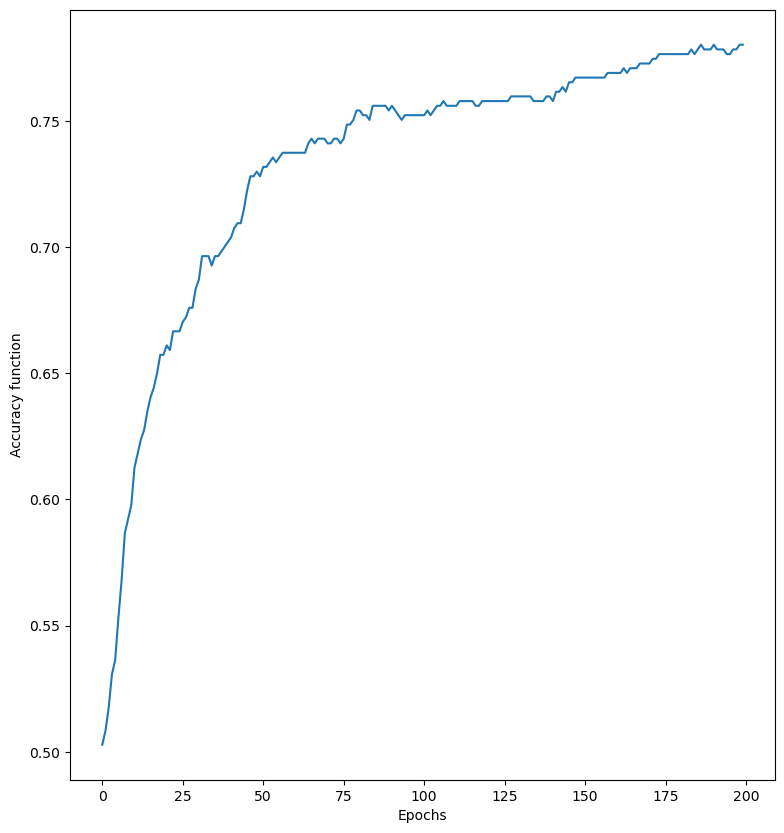

In [12]:
#Ver el performance del modelo en el entrenamiento (accuracy)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
plt.subplot(122)
plt.plot(model_history.history['accuracy'])
plt.xlabel('Epochs'),plt.ylabel('Accuracy function')


In [13]:
#Usar el modelo para predecir
Y_pred = model.predict(X_test) #predecir en términos de decimales
Y_prob = (model.predict(X_test) > 0.5).astype("int32") #en términos de 1 y 0


8/8 [==============================] - 0s 2ms/step


In [14]:
Y_pred

array([[0.31601432],
       [0.13895202],
       [0.10651262],
       [0.3309655 ],
       [0.50513947],
       [0.5722652 ],
       [0.02265176],
       [0.40173995],
       [0.5192146 ],
       [0.68870723],
       [0.20523056],
       [0.6996833 ],
       [0.39191577],
       [0.4979987 ],
       [0.09292336],
       [0.29611486],
       [0.1366609 ],
       [0.06861843],
       [0.36864552],
       [0.56515884],
       [0.2989519 ],
       [0.08343118],
       [0.34587827],
       [0.09193214],
       [0.57520926],
       [0.75531185],
       [0.06917012],
       [0.0498115 ],
       [0.38692248],
       [0.16107339],
       [0.7525127 ],
       [0.8587427 ],
       [0.75982064],
       [0.5701538 ],
       [0.84516513],
       [0.7672962 ],
       [0.4047649 ],
       [0.31252226],
       [0.33085096],
       [0.5274493 ],
       [0.04966335],
       [0.5734981 ],
       [0.60653687],
       [0.4530947 ],
       [0.11213681],
       [0.60677135],
       [0.6645343 ],
       [0.229

In [15]:
Y_prob

array([[0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [16]:
#métricas de performance
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score) #mientras más grandes mejor

#métricas en el train
accu_train = accuracy_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
prec_train = precision_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
reca_train = recall_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))

#métricas en el test
accu_test = accuracy_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
prec_test = precision_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
reca_test = recall_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

8/8 [==============================] - 0s 3ms/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.780 	 0.711 	 0.628
  Test 	 0.727 	 0.616 	 0.562


**Ejemplo Multiclase**

- Aunque las salidas de la red neuronal están limitadas a un rango de valores entre 0 y 1, no se garantiza que la suma de estos sea igual a 1
- Transformar las salidas para que puedan ser usadas como probabilidades ayuda mucho a la interpretabilidad de las predicciones
- Transformación Softmax

$$\hat{p}_{l,i}^{*} = \frac{e^{\hat{y}_{l,i}}}{\sum{e^{\hat{y}_{l,i}}}}$$

- $\hat{y}_{1}=0.25$, $\hat{y}_{2}=0.76$, $\hat{y}_{3}=0.1$

- $\hat{p}_{1}=0.3099$, $\hat{p}_{2}=0.4717$, $\hat{p}_{3}=0.2184$

In [17]:
#Librerías
import pandas as pd
from sklearn import datasets
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
#from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD, Adam
#from tensorflow.keras.optimizers import SGD

In [18]:
#Datos
iris = datasets.load_iris()
X = iris.data
Y = iris.target
Y #tres tipos de flores

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [20]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
#creamos la variable target a dummies para poderla trabajar en la red neuronal
dummy_y = to_categorical(Y).astype(int)

In [22]:
dummy_y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [23]:
#Dividimos los datos en test y train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y,
                                                    test_size=0.2, random_state=42)

In [26]:
#Construcción de la red neuronal

# neural network structure
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='softmax'))#salida

#Gradiente descendente
learning_rate=0.1
epochs = 200
momentum = 0.8
sgd = SGD(learning_rate=learning_rate, momentum=momentum)

# configuracion del optimizador
model.compile(loss='categorical_crossentropy',#funcion de costo
              optimizer=sgd,#gradiente descendente
              metrics=['accuracy'])



history = model.fit(X_train, y_train, 
                   epochs=epochs, 
                   batch_size=100, 
                   validation_data=(X_test,y_test))


Epoch 1/200
2/2 [==============================] - 1s 522ms/step - loss: 1.5743 - accuracy: 0.2833 - val_loss: 1.1368 - val_accuracy: 0.3667
Epoch 2/200
2/2 [==============================] - 0s 81ms/step - loss: 1.1798 - accuracy: 0.4083 - val_loss: 0.7323 - val_accuracy: 0.7000
Epoch 3/200
2/2 [==============================] - 0s 59ms/step - loss: 0.7616 - accuracy: 0.6667 - val_loss: 0.7765 - val_accuracy: 0.6333
Epoch 4/200
2/2 [==============================] - 0s 60ms/step - loss: 0.7131 - accuracy: 0.6667 - val_loss: 0.5500 - val_accuracy: 0.6333
Epoch 5/200
2/2 [==============================] - 0s 46ms/step - loss: 0.5515 - accuracy: 0.6500 - val_loss: 0.4374 - val_accuracy: 0.7000
Epoch 6/200
2/2 [==============================] - 0s 54ms/step - loss: 0.4560 - accuracy: 0.7083 - val_loss: 0.4109 - val_accuracy: 0.9000
Epoch 7/200
2/2 [==============================] - 0s 53ms/step - loss: 0.4065 - accuracy: 0.9417 - val_loss: 0.3938 - val_accuracy: 0.7000
Epoch 8/200
2/2 [==

2/2 [==============================] - 0s 50ms/step - loss: 0.0741 - accuracy: 0.9750 - val_loss: 0.1328 - val_accuracy: 0.9000
Epoch 60/200
2/2 [==============================] - 0s 73ms/step - loss: 0.0982 - accuracy: 0.9583 - val_loss: 0.1061 - val_accuracy: 0.9667
Epoch 61/200
2/2 [==============================] - 0s 53ms/step - loss: 0.0844 - accuracy: 0.9750 - val_loss: 0.1041 - val_accuracy: 0.9667
Epoch 62/200
2/2 [==============================] - 0s 46ms/step - loss: 0.1499 - accuracy: 0.9583 - val_loss: 0.9052 - val_accuracy: 0.8000
Epoch 63/200
2/2 [==============================] - 0s 42ms/step - loss: 0.6311 - accuracy: 0.7583 - val_loss: 0.7102 - val_accuracy: 0.8000
Epoch 64/200
2/2 [==============================] - 0s 46ms/step - loss: 0.5639 - accuracy: 0.7917 - val_loss: 0.6941 - val_accuracy: 0.8000
Epoch 65/200
2/2 [==============================] - 0s 45ms/step - loss: 0.5034 - accuracy: 0.7917 - val_loss: 0.0891 - val_accuracy: 0.9667
Epoch 66/200
2/2 [========

2/2 [==============================] - 0s 65ms/step - loss: 0.0666 - accuracy: 0.9833 - val_loss: 0.0802 - val_accuracy: 0.9667
Epoch 118/200
2/2 [==============================] - 0s 57ms/step - loss: 0.0785 - accuracy: 0.9750 - val_loss: 0.3833 - val_accuracy: 0.8667
Epoch 119/200
2/2 [==============================] - 0s 51ms/step - loss: 0.1989 - accuracy: 0.9167 - val_loss: 0.1076 - val_accuracy: 0.9667
Epoch 120/200
2/2 [==============================] - 0s 41ms/step - loss: 0.1112 - accuracy: 0.9583 - val_loss: 0.2120 - val_accuracy: 0.8667
Epoch 121/200
2/2 [==============================] - 0s 58ms/step - loss: 0.1078 - accuracy: 0.9500 - val_loss: 0.0747 - val_accuracy: 0.9667
Epoch 122/200
2/2 [==============================] - 0s 50ms/step - loss: 0.1035 - accuracy: 0.9750 - val_loss: 0.2294 - val_accuracy: 0.8667
Epoch 123/200
2/2 [==============================] - 0s 52ms/step - loss: 0.1206 - accuracy: 0.9417 - val_loss: 0.0798 - val_accuracy: 0.9667
Epoch 124/200
2/2 [=

Epoch 175/200
2/2 [==============================] - 0s 39ms/step - loss: 0.0640 - accuracy: 0.9833 - val_loss: 0.0889 - val_accuracy: 1.0000
Epoch 176/200
2/2 [==============================] - 0s 50ms/step - loss: 0.0636 - accuracy: 0.9667 - val_loss: 0.0641 - val_accuracy: 0.9667
Epoch 177/200
2/2 [==============================] - 0s 58ms/step - loss: 0.0676 - accuracy: 0.9833 - val_loss: 0.1029 - val_accuracy: 0.9000
Epoch 178/200
2/2 [==============================] - 0s 44ms/step - loss: 0.0671 - accuracy: 0.9667 - val_loss: 0.1529 - val_accuracy: 0.9000
Epoch 179/200
2/2 [==============================] - 0s 43ms/step - loss: 0.0761 - accuracy: 0.9667 - val_loss: 0.0758 - val_accuracy: 0.9667
Epoch 180/200
2/2 [==============================] - 0s 68ms/step - loss: 0.0900 - accuracy: 0.9750 - val_loss: 0.0689 - val_accuracy: 0.9667
Epoch 181/200
2/2 [==============================] - 0s 47ms/step - loss: 0.0792 - accuracy: 0.9750 - val_loss: 0.1512 - val_accuracy: 0.9000
Epoch 

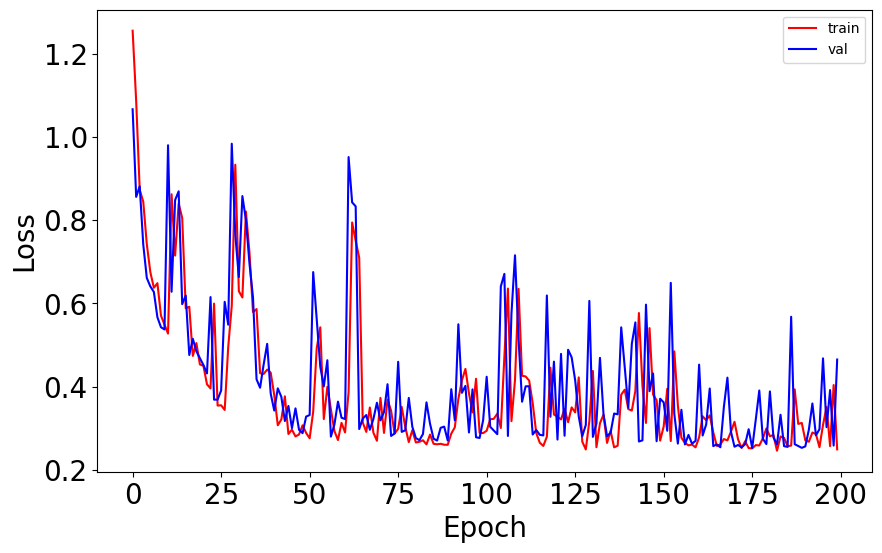

In [27]:
#Graficar el categorical crossentropy
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [28]:
#Predecir con el modelo
Y_pred = model.predict(X_test)
Y_prob = (model.predict(X_test) > 0.5).astype("int32")

1/1 [==============================] - 0s 31ms/step


In [29]:
Y_pred

array([[1.04949322e-05, 9.97051358e-01, 2.93816859e-03],
       [9.99900937e-01, 9.90860935e-05, 5.89474754e-18],
       [3.32209941e-18, 1.09173439e-03, 9.98908281e-01],
       [9.50566027e-06, 9.94395137e-01, 5.59540419e-03],
       [6.67105405e-06, 9.98398721e-01, 1.59458234e-03],
       [9.99769628e-01, 2.30435762e-04, 1.36544901e-16],
       [2.54666060e-02, 9.74513590e-01, 1.98644120e-05],
       [4.43336523e-09, 5.69091558e-01, 4.30908442e-01],
       [1.32659920e-07, 8.84942591e-01, 1.15057305e-01],
       [1.94994034e-03, 9.97952461e-01, 9.76089650e-05],
       [3.77995022e-08, 8.05403054e-01, 1.94596916e-01],
       [9.99590218e-01, 4.09821718e-04, 1.16527858e-15],
       [9.99915004e-01, 8.50461511e-05, 3.33726597e-18],
       [9.99633312e-01, 3.66714376e-04, 7.70329243e-16],
       [9.99848843e-01, 1.51162545e-04, 2.84093362e-17],
       [2.76467981e-05, 9.98570204e-01, 1.40218390e-03],
       [1.63328010e-13, 1.25415763e-02, 9.87458348e-01],
       [6.27643720e-04, 9.99057

In [30]:
Y_prob

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

In [31]:
#Hacer ingenería en reversa, para dejar las predicciones en el formato original que teníamos de las "Y"
uniques, ids = np.unique(Y, return_inverse=True)
dummy_y = to_categorical(ids, len(uniques))
reverse = uniques[dummy_y.argmax(1)]
X_train, X_test, y_train, y_test = train_test_split(X, reverse,
                                                    test_size=0.2, random_state=42)

In [32]:
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [33]:
#Métricas de performance
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)

#métricas en el train
Y_proba= model.predict(X_train)
Y_pred= np.argmax(Y_proba, axis=1)

accu_train = accuracy_score(y_train, Y_pred)
prec_train = precision_score(y_train, Y_pred,average='weighted')
reca_train = recall_score(y_train, Y_pred,average='weighted')


#métricas en el test
Y_proba= model.predict(X_test)
Y_pred= np.argmax(Y_proba, axis=1)

accu_test = accuracy_score(y_test, Y_pred)
prec_test = precision_score(y_test, Y_pred,average='weighted')
reca_test = recall_score(y_test, Y_pred,average='weighted')
print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

1/1 [==============================] - 0s 30ms/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.950 	 0.953 	 0.950
  Test 	 0.867 	 0.908 	 0.867
